In [242]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["SNORKELHOME"] = "/Users/pecastillo/Documents/snorkel/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
from snorkel.learning import GenerativeModel
from scipy import sparse


In [244]:
import pandas as pd
import pickle


In [245]:
n_samples = 1000000
y = np.random.choice([-1, 1], size=(n_samples,), p=[2./3, 1./3])
print(y)
print(len(y))

[ 1 -1 -1 ..., -1  1 -1]
1000000


(array([  85.,  179.,  181.,  157.,  152.,   99.,   81.,   41.,   19.,    6.]),
 array([ 0.01239449,  0.09045758,  0.16852066,  0.24658375,  0.32464683,
         0.40270992,  0.48077301,  0.55883609,  0.63689918,  0.71496226,
         0.79302535]),
 <a list of 10 Patch objects>)

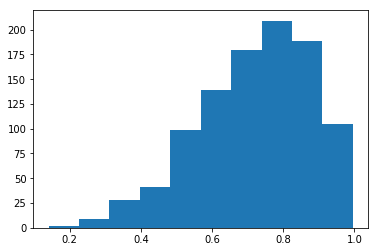

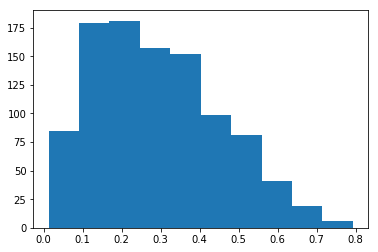

In [246]:
plt.hist(1-np.random.beta(2,5,1000))
plt.figure()
plt.hist(np.random.beta(2,5,1000))

In [247]:
total_LFs = 10
alphas = 1 - np.random.beta(2,5,total_LFs)
betas = 1 - alphas#np.random.beta(2,5,total_LFs) #np.random.uniform(0,1,total_LFs)
print(list(zip(alphas,betas)))

[(0.76575877740192566, 0.23424122259807434), (0.64913933080367292, 0.35086066919632708), (0.79308612174169801, 0.20691387825830199), (0.44037243271767723, 0.55962756728232277), (0.78475249298152761, 0.21524750701847239), (0.83449767512288342, 0.16550232487711658), (0.84132238976196949, 0.15867761023803051), (0.61384565946969738, 0.38615434053030262), (0.87445530150680228, 0.12554469849319772), (0.81076809307425657, 0.18923190692574343)]


In [248]:
L_names = ['LF_' + str(n_LF) for n_LF in range(total_LFs)]
LFs = {}
for n_LF in range(total_LFs):
    LF = y.copy()
    beta_idxs = np.random.choice([False, True], size=(n_samples,), p=[betas[n_LF], 1-betas[n_LF]])
    alpha_idxs = np.random.choice([False, True], size=(n_samples,), p=[alphas[n_LF], 1-alphas[n_LF]])
    LF[beta_idxs] = 0
    LF[alpha_idxs] = -LF[alpha_idxs]
    LFs[L_names[n_LF]] = LF

LFs = pd.DataFrame(LFs)
LFs

,LF_0,LF_1,LF_2,LF_3,LF_4,LF_5,LF_6,LF_7,LF_8,LF_9
0,0,1,1,-1,0,0,0,0,0,0
1,-1,1,0,1,0,1,0,-1,0,0
2,0,0,1,-1,0,0,0,-1,0,0
3,1,-1,0,1,0,-1,0,-1,0,-1
4,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,-1,0,0
6,0,-1,0,1,1,0,0,0,0,0
7,0,0,0,0,0,-1,0,0,0,0
8,0,-1,0,-1,0,0,0,1,0,-1
9,1,1,0,-1,0,0,-1,1,0,0


In [249]:
total = float(len(LFs))
print(total)

stats_table = np.zeros((len(L_names),2))
for i in range(len(L_names)):
    stats_table[i,0] = np.sum(LFs.iloc[:,i] != 0)/total
    stats_table[i,1] = np.sum(LFs.iloc[:,i] == y)/float(np.sum(LFs.iloc[:,i] != 0))


1000000.0


In [250]:
orig_stats = pd.DataFrame(dict(Orig_Coverage = betas, Orig_Accuracy=alphas),index=L_names)
# print(orig_stats)
stats_table = pd.DataFrame(stats_table, columns = ["Coverage", "Accuracy"], index = L_names)
# print(stats_table)
print(pd.concat([stats_table, orig_stats], axis=1))

      Coverage  Accuracy  Orig_Coverage  Orig_Accuracy
LF_0  0.233786  0.766958       0.234241       0.765759
LF_1  0.350864  0.651534       0.350861       0.649139
LF_2  0.207016  0.790794       0.206914       0.793086
LF_3  0.559612  0.439410       0.559628       0.440372
LF_4  0.214743  0.785446       0.215248       0.784752
LF_5  0.165326  0.834158       0.165502       0.834498
LF_6  0.158616  0.841126       0.158678       0.841322
LF_7  0.386453  0.612835       0.386154       0.613846
LF_8  0.126027  0.875392       0.125545       0.874455
LF_9  0.189255  0.810901       0.189232       0.810768


In [251]:
L_train = sparse.csr_matrix(LFs,dtype=int)

gen_model = GenerativeModel()

In [252]:
gen_model.train(L_train, 
                epochs=20, 
                decay=0.95, 
                step_size= 1/ L_train.shape[0], 
                reg_param=1e-20
                ,labels = y
                ,verbose = True
                ,threads=20
               )

Inferred cardinality: 2
FACTOR 0: STARTED BURN-IN...
FACTOR 0: DONE WITH BURN-IN
FACTOR 0: STARTED LEARNING
FACTOR 0: EPOCH #0
Current stepsize = 1e-06
Learning epoch took 0.000 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  0.0

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  0.0

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  0.0

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  0.0

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  0.0

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  0.0

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
  

FACTOR 0: EPOCH #6
Current stepsize = 7.350918906249998e-07
Learning epoch took 15.122 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  -0.812149367006

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  -0.84048417601

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  -0.818283009394

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  -1.1029538012

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  -0.814399550986

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  -0.833744880945

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
        isFixed: False
 

FACTOR 0: EPOCH #12
Current stepsize = 5.403600876626366e-07
Learning epoch took 16.753 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  -0.812191518226

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  -0.840775432772

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  -0.817841719328

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  -1.10292938344

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  -0.815537860441

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  -0.833678555593

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
        isFixed: Fals

FACTOR 0: EPOCH #18
Current stepsize = 3.972143184582182e-07
Learning epoch took 18.173 sec.
Weights:
    weightId: 0
        isFixed: True
        weight:  1.0

    weightId: 1
        isFixed: False
        weight:  -0.811888246563

    weightId: 2
        isFixed: True
        weight:  1.0

    weightId: 3
        isFixed: False
        weight:  -0.83996352731

    weightId: 4
        isFixed: True
        weight:  1.0

    weightId: 5
        isFixed: False
        weight:  -0.819043988817

    weightId: 6
        isFixed: True
        weight:  1.0

    weightId: 7
        isFixed: False
        weight:  -1.10102549734

    weightId: 8
        isFixed: True
        weight:  1.0

    weightId: 9
        isFixed: False
        weight:  -0.814138770397

    weightId: 10
        isFixed: True
        weight:  1.0

    weightId: 11
        isFixed: False
        weight:  -0.832543052109

    weightId: 12
        isFixed: True
        weight:  1.0

    weightId: 13
        isFixed: False

In [253]:
learned_stats = gen_model.learned_lf_stats().iloc[0:total_LFs,:]
learned_stats.index = L_names
learned_stats.columns = ['learned_'+xx for xx in learned_stats.columns]
stats_comparison = pd.concat([stats_table, orig_stats,learned_stats], axis=1)
print(stats_comparison.iloc[:,[0,2,5]])
print(stats_comparison.iloc[:,[1,3,4]])

      Coverage  Orig_Coverage  learned_Coverage
LF_0  0.233786       0.234241            0.6798
LF_1  0.350864       0.350861            0.6699
LF_2  0.207016       0.206914            0.6672
LF_3  0.559612       0.559628            0.6667
LF_4  0.214743       0.215248            0.6739
LF_5  0.165326       0.165502            0.6676
LF_6  0.158616       0.158678            0.6751
LF_7  0.386453       0.386154            0.6573
LF_8  0.126027       0.125545            0.6720
LF_9  0.189255       0.189232            0.6793
      Accuracy  Orig_Accuracy  learned_Accuracy
LF_0  0.766958       0.765759          0.590909
LF_1  0.651534       0.649139          0.582774
LF_2  0.790794       0.793086          0.585432
LF_3  0.439410       0.440372          0.449528
LF_4  0.785446       0.784752          0.582282
LF_5  0.834158       0.834498          0.578191
LF_6  0.841126       0.841322          0.579766
LF_7  0.612835       0.613846          0.570059
LF_8  0.875392       0.874455          0

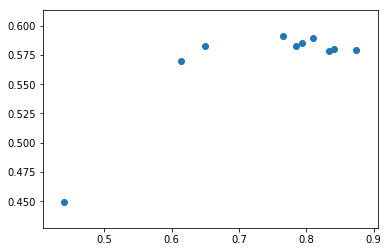

In [254]:
plt.scatter(stats_comparison['Orig_Accuracy'].values,stats_comparison['learned_Accuracy'].values)

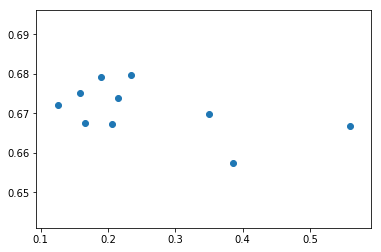

In [255]:
plt.scatter(stats_comparison['Orig_Coverage'].values,stats_comparison['learned_Coverage'].values)

In [256]:
train_marginals = gen_model.marginals(L_train)

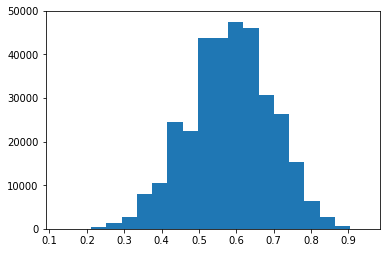

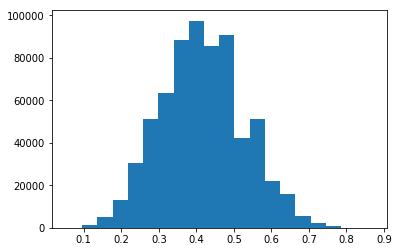

In [257]:
plt.figure()
plt.hist(train_marginals[y==1], bins=20)
plt.show()
plt.figure()
plt.hist(train_marginals[y==-1], bins=20)
plt.show()



In [258]:
marg_accuracy = np.sum([-1 if xx < 0.5 else (1 if xx > 0.5 else 0) for xx in train_marginals] == y)/np.sum(train_marginals != 0.5)

print(marg_accuracy)

0.777317392643


In [259]:
marg_coverage = np.sum(train_marginals != 0.5)/len(train_marginals)

print(marg_coverage)

0.958135


In [260]:
# votes option
y_votes = ((LFs+1)/2).mean(axis=1).values
votes_accuracy = np.sum([-1 if xx < 0.5 else (1 if xx > 0.5 else 0) for xx in y_votes] == y)/np.sum(y_votes != 0.5)

print(votes_accuracy)

0.76936298385


In [261]:
votes_coverage = np.sum(y_votes != 0.5)/len(y_votes)

print(votes_coverage)

0.7802
